In [ ]:
from fastai.vision.all import *
from fastai.data.all import *
from fastai.distributed import *
import pandas as pd
from pathlib import Path
from modules_th.video_block import * 
from time import perf_counter

In [1]:
#export
import os
import cv2
import random
import torchvision.transforms as T

In [4]:
if True:
    raise Exception("prova")
print(3)

Exception: prova

In [7]:
#export
def repeat_video(vid, l):
    """Repeats video "vid" until it reaches target length "l" """
    reap = l // len(vid)
    delta = l % len(vid)
    vid = vid * reap + vid[0:delta]
    return vid

def create_video(vid_path, start=None, l=50, skip=4, form='tens'):
    assert form in ['tens', 'img'], "form should be either 'tens' or 'img'"
    vidcap = cv2.VideoCapture(str(vid_path))
    duration = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
    
    if l=='all': start, l = 0, duration//skip
    elif start is None: start = random.randint(0, max(0, duration-l*skip))
    vid = L()
    for frame_pos in range(start, start+l*skip, skip):
        vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame_pos)
        res, frame = vidcap.read()
        if res: vid.append(frame)
        else:
            if len(vid)==0:
                raise Exception(f"video {vid_path} has no frames")
            vid = repeat_video(vid, l); break 
            
    vidcap.release()
    if form == 'tens': return TensorVideo(vid.stack().permute(3,0,1,2))
    else: return vid.map(PILImage.create)
            
        
class createVideoForm(Transform):
    '''Create a TensorVideo using form=tens or a list of PIL images using form=img '''
    def __init__(self, l='all', skip=3, form='tens'):
        self.l = l
        self.skip = skip
        self.form = form
    
    def encodes(self, vid_path): 
        if self.skip is None:
            self.skip = random.randint(1,4)
        return create_video(vid_path, l=self.l, skip=self.skip, form=self.form)
#     def encodes(self, vid_path):
#         l, skip = self.l, self.skip
#         assert  os.path.exists(vid_path), 'The video path does not exist '
#         vidcap = cv/mnt/data/adrianlopez/Datasets/kinetics700/Videos/Fire.mp42.VideoCapture(str(vid_path))
#         duration = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
#         if l == 'all':
#             start, i = 0, 0
#             l = duration//skip
#             vid = L()
#         else:
#             vid, block = L(), l*skip
#             start, i = random.randint(0, max(0,duration - block)), 0 
#         while len(vid) < l:
#             check = start + i*skip
#             vidcap.set(cv2.CAP_PROP_POS_FRAMES, check)
#             res, frame = vidcap.read()
#             if res:
#                 if self.form == 'tens':
#                     vid.append(frame)
#                 elif self.form == 'img':
#                     frame = PILImage.create(frame)
#                     vid.append(frame)
#                 else:
#                     raise ValueError('form should be either tens or img')
#             else:
#                 # If video is shorter than the block repeat frames
#                 re/mnt/data/adrianlopez/Datasets/kinetics700/Videos/Fire.mp4ap =  l // len(vid)
#                 delta = l % len(vid)
#                 vid = vid * reap + vid[0:delta]
#                 break
#             i += 1           
#         vidcap.release()
#         if self.form == 'tens':
#             return TensorVideo(vid.stack().permute(3,0,1,2))
#         else:
#             return Video(vid)


class RandomCrop(Transform):
    def __init__(self, size: tuple ):
        self.size = size
    def encodes(self, ts_vd):
        return T.RandomCrop(self.size)(ts_vd)
    
class RandomHFlip(Transform):
    def __init__(self, p ):
        self.p = p
    def encodes(self, ts_vd):
        return T.RandomHorizontalFlip(self.p)(ts_vd)
class RandomColorJitter(Transform):
    def __init__(self,brightness=0, contrast=0, saturation=0, hue=0):
          self.transform = T.ColorJitter(brightness= brightness, contrast=contrast, saturation=saturation, hue=hue)
    def encodes(self, ts_vid):
        return self.transform(tstransformer_vid.permute(1,0,2,3)).permute(1,0,2,3)

NameError: name 'Transform' is not defined

In [8]:
vid_path = '/mnt/data/eugeniomarinelli/UCF_Crimes/Videos/Abuse/Abuse005_x264.mp4'

start_time = perf_counter()
for i in range(10):
    v = create_video(vid_path, l=40, skip=4)
    
print(v.shape)
print((perf_counter()-start_time)/5)

NameError: name 'perf_counter' is not defined

In [ ]:
vid_paths = get_files('/mnt/data/eugeniomarinelli/UCF_Crimes/Videos', extensions='.mp4')
vid_path = random.choice(vid_paths)
ts_vid = createVideoForm(l=30, skip=3)(vid_path)

In [ ]:
ts_vid.shape

(3, 30, 240, 320)

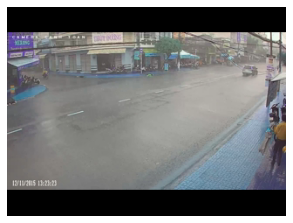

In [ ]:
ts_vid.show()

In [10]:
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_losses_tmp.ipynb.
Converted 02_inflator.ipynb.
Converted 03_video_block.ipynb.
Converted 05_charades.ipynb.
Converted 07_read_video_function.ipynb.
Converted 08_transformer.ipynb.
Converted 09_lr_schedule.ipynb.
Converted 10_experiments_on_images.ipynb.
Converted 11_create_embeddings.ipynb.
Converted 12_load_r2p1d_model.ipynb.
Converted CALTECH101_MixedLoss.ipynb.
Converted CALTECH101_singleloss.ipynb.
Converted Embeddings_CRIMES.ipynb.
Converted Embeddings_UCF101.ipynb.
Converted KINETICS.ipynb.
Converted UCF101.ipynb.
Converted UCF101_unsupervised.ipynb.
Converted UCF_Crimes_CEL.ipynb.
Converted UCF_Crimes_SupCon.ipynb.
Converted index.ipynb.


In [ ]:
# default_exp video_block